In [33]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load the dataset
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)

In [3]:
# check the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
# describe the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


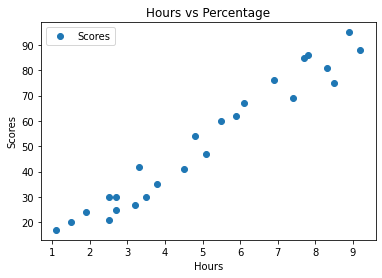

In [7]:
# plot the data to check the relaptionship
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [8]:
#convert dataset in input and target
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [13]:
# check the shape of data
print('The shape of X is:',X.shape)
print('The shape of y is:',y.shape)

The shape of X is: (25, 1)
The shape of y is: (25,)


In [16]:
# # converting data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# check the length of x train and y train
len(X_train),len(y_train)

(20, 20)

In [22]:
# to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
# apply the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred=reg.predict(X_test)


In [37]:
# to plot the linear regression line
#line=reg.coef_ * X + reg.intercept_
#plt.scatter(X,y,color='red')
#plt.plot(X,line)
#plt.show()

In [43]:
# check the actual and prediction values
df=pd.DataFrame({'Actual':y_test,'prediction':y_pred})

In [44]:
df

,Actual,prediction
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [45]:
# to predict our own data
hours=9.25
# convert hours in array and reshape it
hours=np.array(hours).reshape(-1,1)

In [48]:
# to make prediction
own_pred=reg.predict(hours)
print('The hours are =',hours)
print('predictions are = ',own_pred[0])

The hours are = [[9.25]]
predictions are =  274.9163654008331


In [51]:
# to check the error
from sklearn.metrics import mean_squared_error
print('the error is =',mean_squared_error(X_train,y_train))

the error is = 3156.5032182917116
